In [1]:
import pandas as pd
import numpy as np

In [2]:
adm_data=pd.read_csv("D:\DEEPALI\Lectures\Fundamentals of Data Science\Admission_Predict.csv")

In [3]:
adm_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
x=adm_data.iloc[:,1:8]

In [5]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [6]:
y=adm_data.iloc[:,8]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model1=LinearRegression()

In [11]:
model1.fit(x_tr,y_tr)

LinearRegression()

In [12]:
p=model1.predict(x_test)

In [13]:
p

array([0.73073061, 0.70047894, 0.70679413, 0.82820608, 0.70949786,
       0.60298283, 0.77095849, 0.88687415, 0.48946628, 0.82539982,
       0.63481576, 0.74469926, 0.69221117, 0.68741683, 0.7364372 ,
       0.62967053, 0.66212596, 0.6834559 , 0.8620906 , 0.87542144,
       0.50668898, 0.58289398, 0.59462397, 0.85545745, 0.47069466,
       0.7475963 , 0.81301037, 0.52447216, 0.69772579, 0.78220224,
       0.73093416, 0.80720214, 0.73224646, 0.93184946, 0.60239782,
       0.53563191, 0.8526576 , 0.65310105, 0.82524387, 0.50759171,
       0.87878121, 0.71958908, 0.72779404, 0.77132528, 0.64074656,
       0.77143254, 0.52569218, 0.70866013, 0.67826091, 0.84977113,
       0.90626428, 0.689224  , 0.81474951, 0.83830797, 0.74019213,
       0.878266  , 0.77067551, 0.82144408, 0.88066612, 0.96513053,
       0.80704633, 0.79002318, 0.65712113, 0.66652109, 0.96314213,
       0.52410825, 0.70744512, 0.93425829, 0.48553203, 0.82879902,
       0.58018689, 0.79721848, 0.73687756, 0.60341194, 0.54561

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test,p)

0.8432679574005364

In [16]:
from scipy.stats import pearsonr

In [17]:
corr,_=pearsonr(y_test,p)

In [18]:
corr**2

0.8449535830327644

In [19]:
import seaborn as sns

In [20]:
resid=np.array(y_test)-np.array(p)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

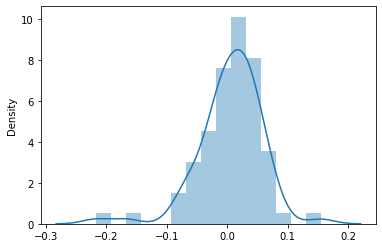

In [21]:
sns.distplot(resid)

In [22]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [23]:
skew(resid)

-1.158803632550581

In [24]:
kurtosis(resid)

4.128858838377022

In [25]:
import scipy.stats as s
import pylab

<function matplotlib.pyplot.show(close=None, block=None)>

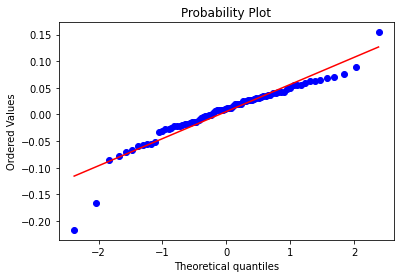

In [26]:
s.probplot(resid,dist="norm",plot=pylab)
pylab.show

In [27]:
# shapiro 
from scipy import stats
stats.shapiro(resid)

ShapiroResult(statistic=0.9167109727859497, pvalue=6.671618029940873e-05)

The p-value for the Shapiro-WIlk test is less than 0.05. Hence we reject the null hypothesis and conclude that the residuals do not follow normal distribution.

In [28]:
# Durbin-Watson
from statsmodels.stats.stattools import durbin_watson

In [29]:
dbest=durbin_watson(resid)
print(dbest)

1.98822406331979


The Durban-Watson test statistic is between 1.5 and 2.5. No auto collinearity is present.

# OLS

In [30]:
adm_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
adm_data.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

In [32]:
adm_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [33]:
adm_data.columns=['SerialNo', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP',
       'LOR', 'CGPA', 'Research', 'ChanceofAdmit']

In [34]:
adm_data.head()

,SerialNo,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [36]:
adm_tr,adm_test=train_test_split(adm_data,test_size=0.2)

In [37]:
model_ols=ols("ChanceofAdmit~SerialNo+GREScore+TOEFLScore+UniversityRating+SOP+LOR+CGPA+Research",data=adm_data).fit()

In [38]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     220.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.52e-140
Time:                        16:59:39   Log-Likelihood:                 553.63
No. Observations:                 400   AIC:                            -1089.
Df Residuals:                     391   BIC:                            -1053.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2936      0.120    -10.775      0.000      -1.530      -1.058
SerialNo             0.0002   2.77e-05      5.753      0.000       0.000       0.000
GREScore             0.0018      0.001      3.129      0.002       0.001       0.003
TOEFLScore           0.0037      0.001      3.487      0.001       0.002       0.006
UniversityRating     0.0088      0.005      1.903      0.058      -0.000       0.018
SOP               9.937e-05      0.005      0.018      0.985      -0.010       0.011
LOR                  0.0215      0.005      4.041      0.000       0.011       0.032
CGPA                 0.1053      0.012      8.786      0.000       0.082       0.129
Research             0.0244      0.008      3.185      0.002       0.009       0.039
==============================================================================
Omnibus:                       65.071   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.066
Skew:                          -0.955   Prob(JB):                     7.62e-25
Kurtosis:                       4.737   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
p_ols=model_ols.predict(adm_test)

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(adm_test["ChanceofAdmit"],p_ols)

0.8008254525369431

In [42]:
# Breusch Pagan test for heteroskedasticity
import statsmodels.stats.api as s

In [44]:
s.het_breuschpagan(model_ols.resid,model_ols.model.exog)

(43.443517929786864,
 7.246435851159342e-07,
 5.955022683896161,
 3.2354167791622997e-07)

P-value is less than 0.05. So we accept the alternate hypothesis, heteroscedasticity is present.

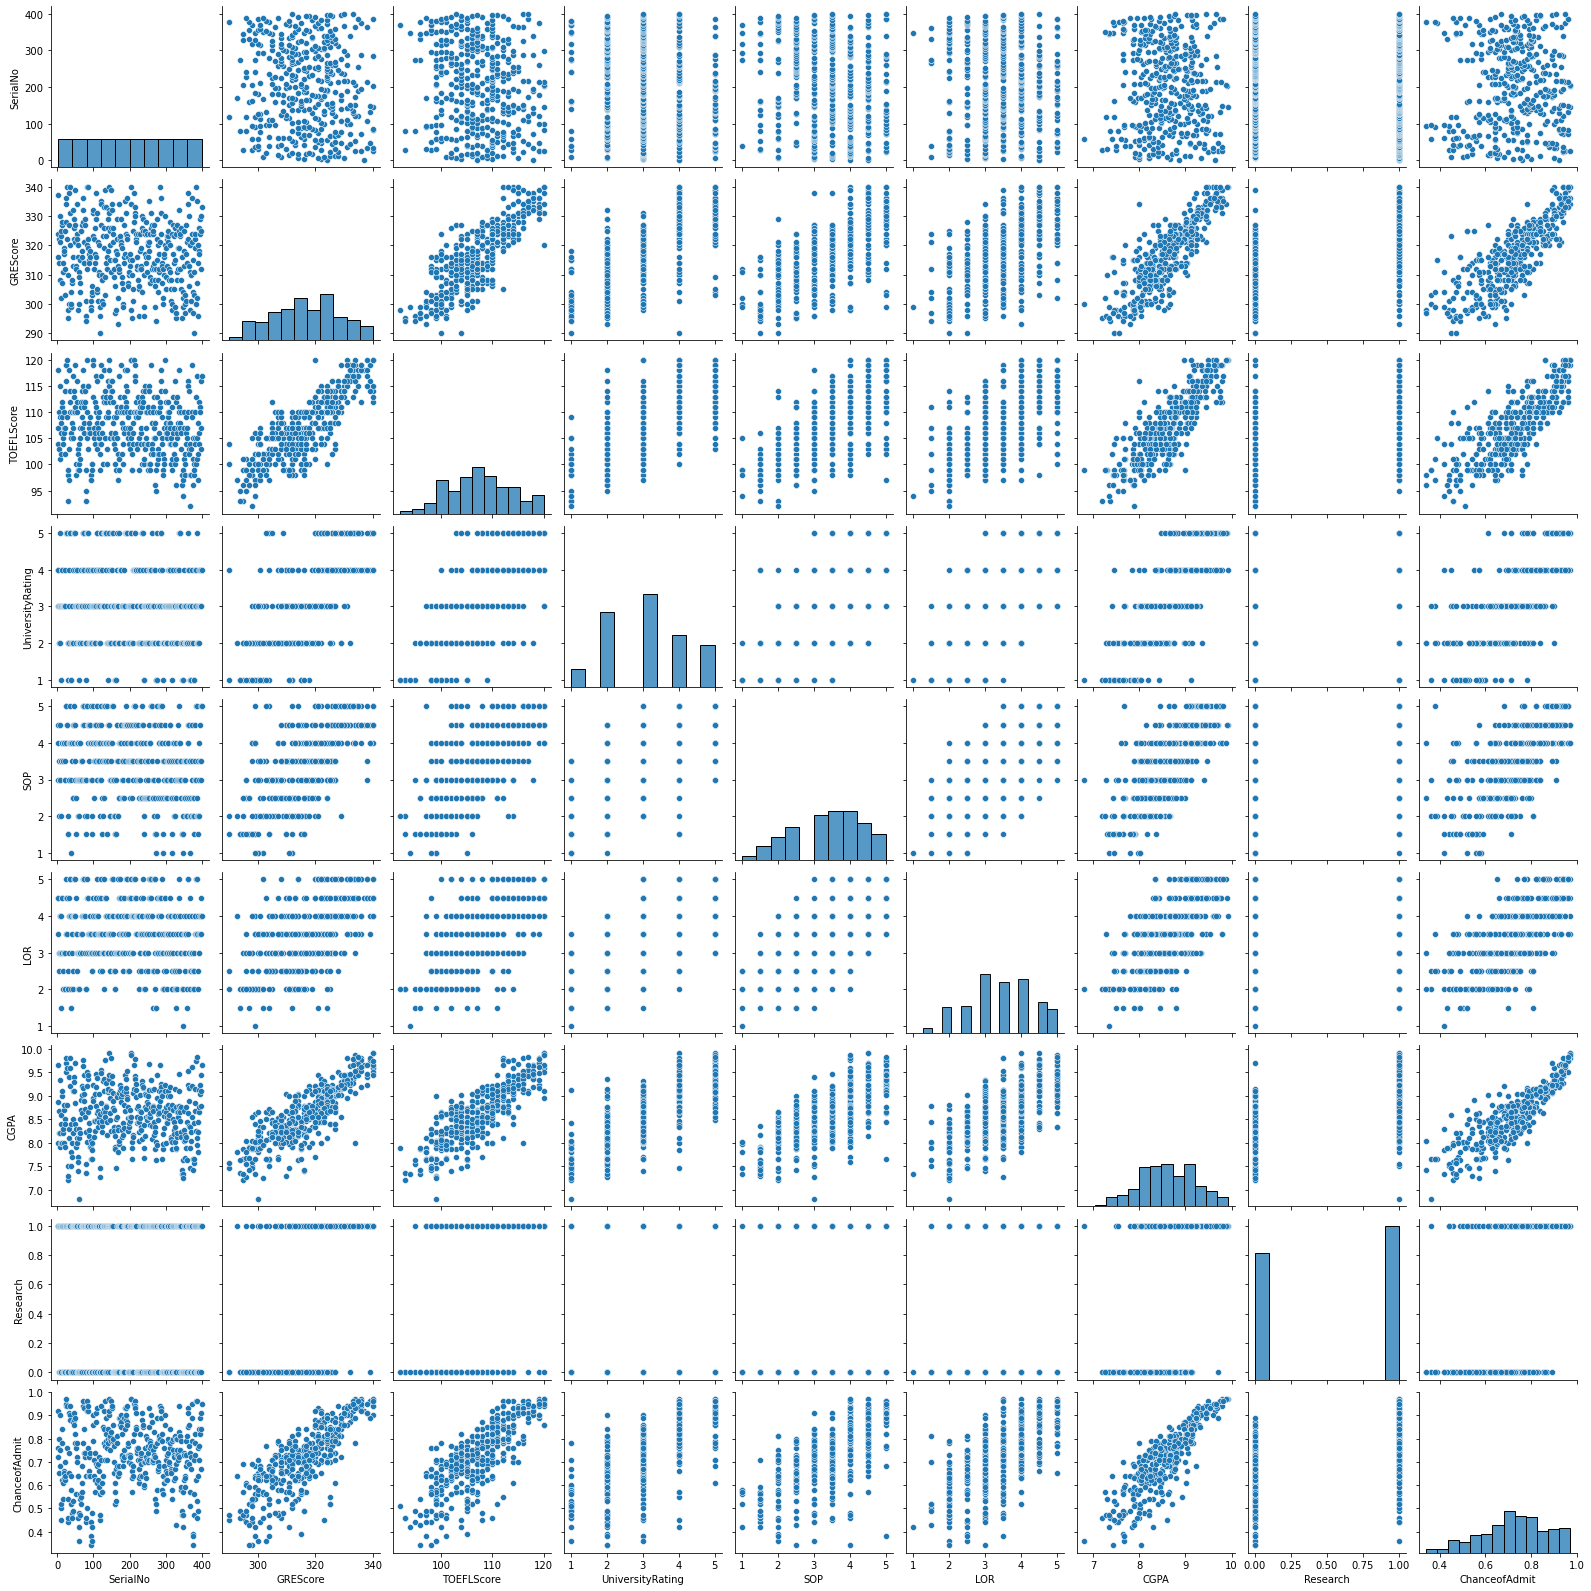

In [46]:
import seaborn as sns
sns.pairplot(adm_data)

<AxesSubplot:>

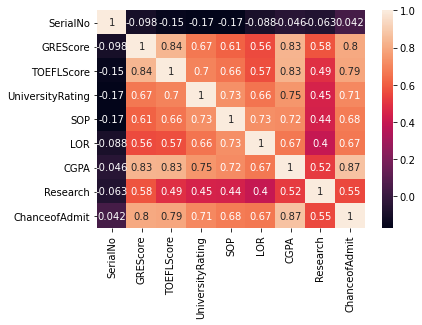

In [47]:
sns.heatmap(adm_data.corr(),annot=True)